# Indexing

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import join_date_time

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('default')

For this section we'll work with the flights dataset.

In [2]:
columns = [
    'FL_DATE', 'UNIQUE_CARRIER', 'AIRLINE_ID',
    'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST',
    'DEP_TIME', 'DEP_DELAY', 'ARR_TIME',
    'ARR_DELAY', 'CANCELLED'
]

flights = (pd.read_csv("data/flights.csv.zip",
                       parse_dates=["FL_DATE"],
                       usecols=columns)
             .rename(columns=str.lower)
             .pipe(join_date_time))

flights.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01,AA,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01,AA,19805,N339AA,2,LAX,JFK,"1,132.00",122.00,"1,951.00",111.00,0.00,2014-01-01 19:51:00,2014-01-01 11:32:00
2,2014-01-01,AA,19805,N335AA,3,JFK,LAX,"1,157.00",-3.00,"1,523.00",13.00,0.00,2014-01-01 15:23:00,2014-01-01 11:57:00
3,2014-01-01,AA,19805,N367AA,5,DFW,HNL,"1,307.00",2.00,"1,746.00",1.00,0.00,2014-01-01 17:46:00,2014-01-01 13:07:00
4,2014-01-01,AA,19805,N364AA,6,OGG,DFW,"1,753.00",-2.00,452.00,-8.00,0.00,2014-01-01 04:52:00,2014-01-01 17:53:00


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Data columns (total 14 columns):
fl_date           471949 non-null datetime64[ns]
unique_carrier    471949 non-null object
airline_id        471949 non-null int64
tail_num          467903 non-null object
fl_num            471949 non-null int64
origin            471949 non-null object
dest              471949 non-null object
dep_time          441622 non-null float64
dep_delay         441622 non-null float64
arr_time          440453 non-null float64
arr_delay         439620 non-null float64
cancelled         471949 non-null float64
arr               440453 non-null datetime64[ns]
dep               441622 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(2), object(4)
memory usage: 50.4+ MB


It covers January 2014. Each record has information about a single flight including the carrier, tail number, origin, destination, and delays.

To get a bit of intuition about the data we're working with, let's to a brief bit of exploratory analysis:

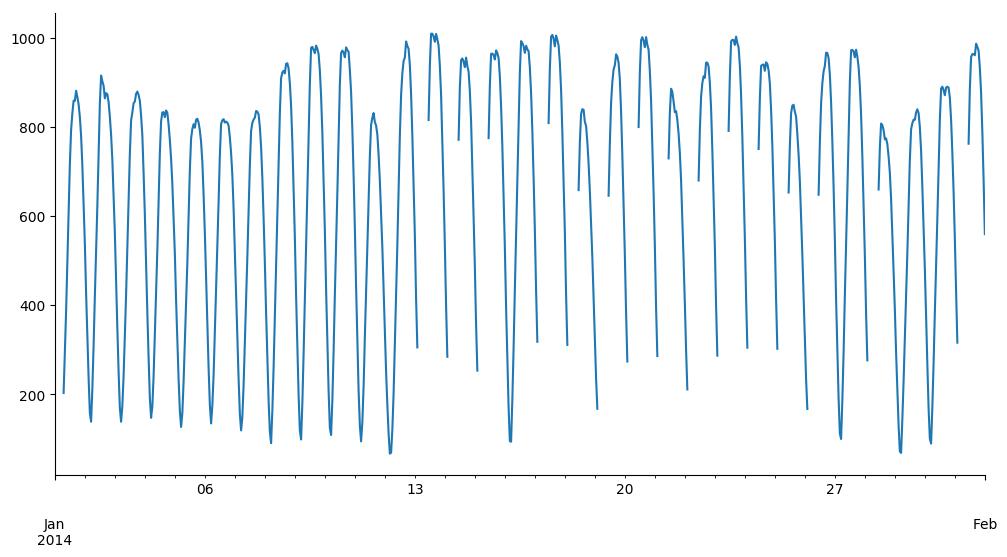

In [4]:
(flights.dep
    .value_counts()
    .resample('H')
    .sum()
    .rolling(8).mean()
    .plot(figsize=(12, 6)))
sns.despine()

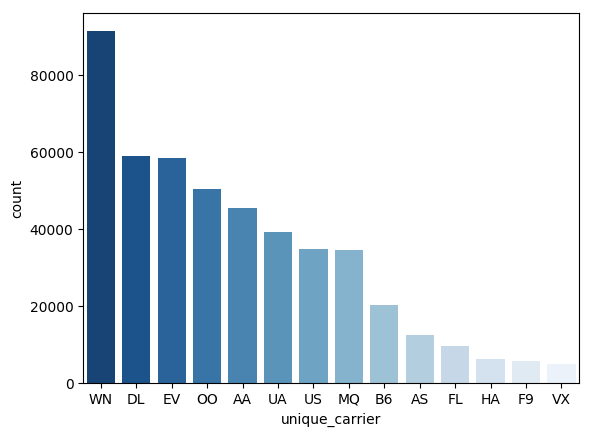

In [5]:
sns.countplot(flights.unique_carrier,
              order=flights.unique_carrier.value_counts().index,
              palette='Blues_r');

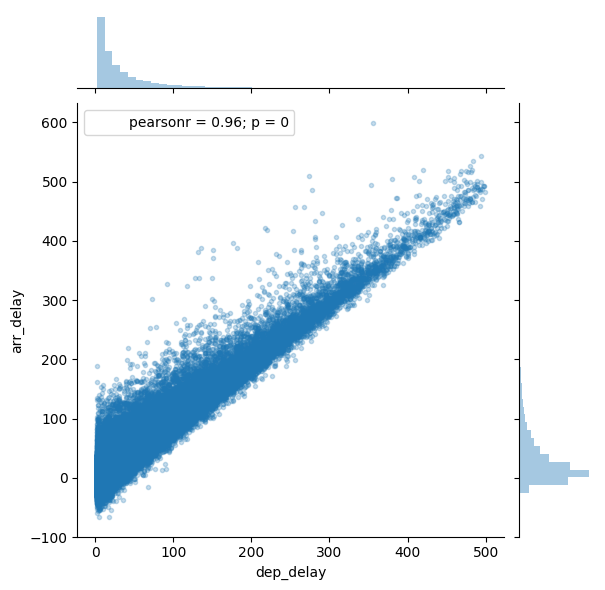

In [6]:
sns.jointplot('dep_delay', 'arr_delay',
              flights[(flights.dep_delay > 1) & (flights.dep_delay < 500)],
              alpha=.25, marker='.');

And now to the incredibly dry (but important!) topic of indexing.
It's a good starting point, because it comes up in so many other places;
It's a terrible starting point because it's somewhat complicated, and somewhat boring.

Indexing tries to do so much.

- Like lists, you can index by integer location.
- Like dictionaries, you can index by label.
- Like NumPy arrays, you can index by boolean masks.
- You can index with scalar, `slice`s, or arrays
- Any of these should work on the index (row labels) or columns of a DataFrame.
- And any of these should work on Hierarchical indexes.

Let's get a DataFrame with a labeled index by selecting the
first flight for each carrier. We'll talk about `groupby` later.

In [7]:
first = flights.groupby("unique_carrier").first()
first.head()

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
AS,2014-01-01,19930,N524AS,1,DCA,SEA,733.00,-12.00,"1,022.00",-15.00,0.00,2014-01-01 10:22:00,2014-01-01 07:33:00
B6,2014-01-01,20409,N317JB,1236,SJU,STT,809.00,-11.00,840.00,-14.00,0.00,2014-01-01 08:40:00,2014-01-01 08:09:00
DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00
EV,2014-01-01,20366,N906EV,2500,DFW,HOU,"1,805.00",70.00,"2,005.00",65.00,1.00,2014-01-01 20:05:00,2014-01-01 18:05:00


In [8]:
first.shape

(14, 13)

# The Basic Rules

The one cell to take away from our session:

1. Use `.loc` for label-based indexing
2. Use `.iloc` for position-based indexing

## Label-Based Indexing

In [9]:
first.index

Index(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US',
       'VX', 'WN'],
      dtype='object', name='unique_carrier')

In [10]:
carriers = ['AA', 'DL', 'US', 'WN']
# Select those carriers by label
first.loc[carriers]

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00
US,2014-01-01,20355,N650AW,553,SEA,PHL,834.00,-1.00,"1,632.00",-9.00,0.00,2014-01-01 16:32:00,2014-01-01 08:34:00
WN,2014-01-01,19393,N412WN,2,DEN,LGA,"1,045.00",15.00,"1,624.00",9.00,0.00,2014-01-01 16:24:00,2014-01-01 10:45:00


The more general form is `.loc[row_indexer, column_indexer]`, where an indexer is  one of

- A scalar or array of row labels
- A `slice` object
- A boolean mask

Let's step through these possibilites:

## Scalar / Array

In [11]:
# select just `carriers` and origin, dest, and dep_delay
first.loc[carriers, ['origin', 'dest', 'dep_delay']]

,origin,dest,dep_delay
unique_carrier,,,
AA,JFK,LAX,14.00
DL,ATL,MIA,70.00
US,SEA,PHL,-1.00
WN,DEN,LGA,15.00


Pandas will *reduce dimensionality* when possible, so slicing with a scalar
will return a Series (usually; the exception being duplicates in the index or columns)

In [12]:
# select just tail_num for those `carriers`
first.loc[carriers, 'tail_num']

unique_carrier
AA    N338AA
DL    N911DL
US    N650AW
WN    N412WN
Name: tail_num, dtype: object

## `slice` objects

`slice`s make the most sense when your index is sorted. Groupby sorts the keys for us, so  we're OK here.

In [13]:
# slice from AA to DL
first.loc['AA':'DL']

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
AS,2014-01-01,19930,N524AS,1,DCA,SEA,733.00,-12.00,"1,022.00",-15.00,0.00,2014-01-01 10:22:00,2014-01-01 07:33:00
B6,2014-01-01,20409,N317JB,1236,SJU,STT,809.00,-11.00,840.00,-14.00,0.00,2014-01-01 08:40:00,2014-01-01 08:09:00
DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00


Notice that the slice is inclusive on *both* sides *when using `.loc`* (`.iloc` follows the usual python rules of closed on the left, open on the right).

## Boolean Indexing

This is esstentially a SQL `WHERE` clause. For examples, get the top 5 most common carriers.

In [14]:
# Get the counts for `flights.unique_carrier`
counts = flights.unique_carrier.value_counts()

In [15]:
# Get a boolean mask for wether `counts` is in the top 5.
mask = counts.index.isin(counts[:5].index)
mask

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False], dtype=bool)

*We used the `.isin` method there, which is handy for checking membership of a set. It's available on `Index`, `Series`, and `DataFrame`*.

In [16]:
# Filter to the `mask` rows
first.loc[mask, ['tail_num', 'fl_num']]

,tail_num,fl_num
unique_carrier,,
AA,N338AA,1
AS,N524AS,1
B6,N317JB,1236
DL,N911DL,7
EV,N906EV,2500


The reguler `__getitem__` (square brackets) also accepts a boolean mask, which will subset the rows. This is similar to NumPy.

In [17]:
first[mask]

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
AS,2014-01-01,19930,N524AS,1,DCA,SEA,733.00,-12.00,"1,022.00",-15.00,0.00,2014-01-01 10:22:00,2014-01-01 07:33:00
B6,2014-01-01,20409,N317JB,1236,SJU,STT,809.00,-11.00,840.00,-14.00,0.00,2014-01-01 08:40:00,2014-01-01 08:09:00
DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00
EV,2014-01-01,20366,N906EV,2500,DFW,HOU,"1,805.00",70.00,"2,005.00",65.00,1.00,2014-01-01 20:05:00,2014-01-01 18:05:00


Boolean indexers are useful because so many operations can produce an array of booleans.

- null checks (`.isnull`, `.notnull`)
- container checks (`.isin`)
- boolean aggregations (`.any`, `.all`)
- comparisions (`.gt`, `.lt`, etc.)

In [18]:
flights.dep.isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: dep, dtype: bool

In [19]:
flights[flights.dep.isnull()].head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
95,2014-01-01,AA,19805,N583AA,193,MCI,ORD,nan,nan,nan,nan,1.00,NaT,NaT
96,2014-01-01,AA,19805,N583AA,193,ORD,MCI,nan,nan,nan,nan,1.00,NaT,NaT
104,2014-01-01,AA,19805,N3DRAA,197,SFO,ORD,nan,nan,nan,nan,1.00,NaT,NaT
198,2014-01-01,AA,19805,N3CKAA,288,ORD,BOS,nan,nan,nan,nan,1.00,NaT,NaT
321,2014-01-01,AA,19805,N3EAAA,359,LGA,ORD,nan,nan,nan,nan,1.00,NaT,NaT


<div class="alert alert-success">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>

Filter down to rows where the departure **`hour`** is before 6:00 or after 18:00.

- Hint: Use the `flights.dep.dt` namespace
- Hint: Be careful with the order of operations

In [20]:
# %load solutions/indexing_00.py
flights[(flights.dep.dt.hour <= 6) |
        (flights.dep.dt.hour >= 18)].head()


,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
6,2014-01-01,AA,19805,N372AA,8,HNL,DFW,"1,839.00",39.00,620.00,60.00,0.00,2014-01-01 06:20:00,2014-01-01 18:39:00
7,2014-01-01,AA,19805,N3KBAA,9,LAX,MIA,"2,211.00",16.00,552.00,17.00,0.00,2014-01-01 05:52:00,2014-01-01 22:11:00
8,2014-01-01,AA,19805,N328AA,10,LAX,JFK,"2,122.00",7.00,523.00,-2.00,0.00,2014-01-01 05:23:00,2014-01-01 21:22:00
9,2014-01-01,AA,19805,N5DHAA,14,OGG,LAX,"2,306.00",-7.00,617.00,-3.00,0.00,2014-01-01 06:17:00,2014-01-01 23:06:00
10,2014-01-01,AA,19805,N3LGAA,15,BOS,ORD,606.00,-4.00,821.00,11.00,0.00,2014-01-01 08:21:00,2014-01-01 06:06:00


<div class="alert alert-success">
  <h1><i class="fa fa-tasks" aria-hidden="true"></i> Exercise</h1>
</div>

Filter `flights` to just the rows where the origin is `'ATL'`, and the `dest` is in the top 3 most common destinations for `'ATL'`.
- Hint: you'll want to break it up into multiple operations
- Hint: use `&` to do the element-wise and of two numpy arrays (use `|` for or).

In [21]:
# %load solutions/indexing_01.py
m1 = flights.origin == 'ATL'
most_common = flights.loc[m1, 'dest'].value_counts().index[:3]
m2 = flights.dest.isin(most_common)

flights[m1 & m2].head()


,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
2571,2014-01-01,DL,19790,N617DL,39,ATL,MCO,"1,552.00",-3.00,"1,714.00",-6.00,0.00,2014-01-01 17:14:00,2014-01-01 15:52:00
2624,2014-01-01,DL,19790,N978DL,331,ATL,MCO,"1,815.00",20.00,"1,944.00",19.00,0.00,2014-01-01 19:44:00,2014-01-01 18:15:00
2800,2014-01-01,DL,19790,N922DL,786,ATL,LGA,"1,747.00",2.00,"1,929.00",-35.00,0.00,2014-01-01 19:29:00,2014-01-01 17:47:00
2809,2014-01-01,DL,19790,N901DE,802,ATL,LGA,"1,443.00",-2.00,"1,640.00",-17.00,0.00,2014-01-01 16:40:00,2014-01-01 14:43:00
2854,2014-01-01,DL,19790,N667DN,871,ATL,MCO,"2,149.00",-1.00,"2,314.00",-1.00,0.00,2014-01-01 23:14:00,2014-01-01 21:49:00


# Position-Based Indexing

Uses `.iloc`.

In [22]:
# select the first two rows, and the 3rd, 4th, and 5th columns
first.iloc[:2, [2, 3, 4]]

,tail_num,fl_num,origin
unique_carrier,,,
AA,N338AA,1,JFK
AS,N524AS,1,DCA


The same general form applies. Use `.iloc[row_indexer, column_indexer]`, where an indexer is a scalar or array of **positions**, a slice (by position) or a boolean mask. Notice that the slice is open on the right (like regular python slices).

## Mixing

Say you want rows `[2, 4, 7]` (position), but the columns `['origin', 'dest', 'dep_delay']`. 

*Historically* (not any more!) this would be done with `.ix`.

In [23]:
first.ix[[2, 4, 7], ['origin', 'dest', 'dep_delay']]

,origin,dest,dep_delay
unique_carrier,,,
B6,SJU,STT,-11.00
EV,DFW,HOU,70.00
HA,HNL,OGG,-7.00


Now we recommend finding the labels by position, and then passing those labels into `.loc`.

In [24]:
# Index.__getitem__ is always positional
# Lookup the row_labels from `first.index` by position
row_labels = first.index[[2, 4, 7]]
row_labels

Index(['B6', 'EV', 'HA'], dtype='object', name='unique_carrier')

In [25]:
cols = ['origin', 'dest', 'dep_delay']
first.loc[row_labels, cols]

,origin,dest,dep_delay
unique_carrier,,,
B6,SJU,STT,-11.00
EV,DFW,HOU,70.00
HA,HNL,OGG,-7.00


Why not use `.ix`? Let's take a look at an almost identical example.
Instead of grouping by `unique_carrier` (a string column), we'll group by `airline_id`, a column of integers. Other than that (and the row ordering), the data is the same.

In [26]:
from utils import side_by_side

other = flights.groupby('airline_id').first()
side_by_side(first[cols].sort_values('origin'),
             other[cols].sort_values('origin'), 'first', 'other')

Can you predict the output of this?

```python
other.ix[[2, 4, 7], cols]
```

<a href="#answer" class="btn btn-default" data-toggle="collapse">Show Answer</a>
<div id="answer" class="collapse">
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>origin</th>
      <th>dest</th>
    </tr>
    <tr>
      <th>airline_id</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2</th>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

</div>

<div style="padding-bottom: 10cm"></div>

What happened? Why did we get a different result that `first.ix[[2, 4, 7], cols]`?
It comes down to the index dtype:

In [27]:
first.index.dtype

dtype('O')

In [28]:
other.index.dtype

dtype('int64')

- Since `first` has a string index, `first.ix[[2, 4, 7]]` looks for the *positions* 2, 4, and 7.
- Since `other` has an integer index, `other.ix[[2, 4, 7]]` will look for the *labels* `[2, 4, 7]`;

`.ix` is also happy to return a DataFrame of all `NaN`s when there are missing values.

In [29]:
first.ix[['a', 'b'], 'fl_date']

unique_carrier
a   NaT
b   NaT
Name: fl_date, dtype: datetime64[ns]

`.loc` requires at least one key to be present, else it raises a `KeyError`.

# `SettingWithCopy`

One of the most common complaints about pandas. Make a new variable `df` that selects `['unique_carrier', 'tail_num', 'dep_delay', 'arr_delay']`

In [30]:
df = flights[['unique_carrier', 'tail_num', 'dep_delay', 'arr_delay']]
df.head()

,unique_carrier,tail_num,dep_delay,arr_delay
0,AA,N338AA,14.00,13.00
1,AA,N339AA,122.00,111.00
2,AA,N335AA,-3.00,13.00
3,AA,N367AA,2.00,1.00
4,AA,N364AA,-2.00,-8.00


`SettingWithCopy` most often comes up when you do *chained indexing*. This is where you chain together multiple callse to `__getimem__`; You can spot this with back-to-back square brackets: `][`

In [31]:
df[df.unique_carrier == "AA"]['dep_delay'] = 10

/Users/tom.augspurger/miniconda3/envs/uni/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Let's break that apart. First, in python, square brackets are syntactic sugar for the `__getitem__` and `__setitem__` methods.

| Operation | Sugared   | Desugared             |
| --------- | --------- | --------------------- |
| `getitem` | `x[i]`    | `x.__getitem__(i)`    |
| `setitem` | `x[i] = v`| `x.__setitem__(i, v)` |

So our above line 

```python
df[df.unique_carrier == "AA"]['dep_delay'] = 10
```

had a couple operations; We'll use `t1` as a "temporary" varible, that you never actually see:

1. `t1 = df.__getitem__(df.unique_carrier == AA")`
2. `t1.__setitem__('dep_delay', 10)`

On it's own there's nothing wrong with that code, *assuming `t1` is a view of `df`*. But if `t1` is a **copy** of `df`, then any modifications of it will not show up in `df`. So if `t1` is a copy, setting `t1['dep_delay'] = 10` will happen, but the result is immediatly discarded because `t1` doesn't actaully exist.

The warning message gives the solution: Use `.loc` and the warning goes away:

In [32]:
df.loc[df.unique_carrier == 'AA', 'dep_delay'] = 10

/Users/tom.augspurger/miniconda3/envs/uni/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


!!!! I think this is why `SettingWithCopyWarning` is so infamous. Does anyone know what happened? Think about how we created `df`.

Since we did `df = flights[list_of_columns]`, `df` *might* be a view of `flights` (it depends on the dtypes and I think some NumPy things).
This means that changes to `df` *might* propogate back up to `flights`.
So pandas throws the warning since we can't be sure.

To fix that, we should have done `df = flights[columns].copy()` (assuming we don't want the change to propogate back up).

# Hierarchical Indexing

Indexes are about

1. Alignment
2. Easier slicing

We'll talk about alignment in the next notebook, but for now, slicing:

In [33]:
first.loc[carriers]

,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
unique_carrier,,,,,,,,,,,,,
AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00
US,2014-01-01,20355,N650AW,553,SEA,PHL,834.00,-1.00,"1,632.00",-9.00,0.00,2014-01-01 16:32:00,2014-01-01 08:34:00
WN,2014-01-01,19393,N412WN,2,DEN,LGA,"1,045.00",15.00,"1,624.00",9.00,0.00,2014-01-01 16:24:00,2014-01-01 10:45:00


Is the same as

In [34]:
first2 = first.reset_index()  # just setup
first2[first2.unique_carrier.isin(carriers)]

,unique_carrier,fl_date,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,AA,2014-01-01,19805,N338AA,1,JFK,LAX,914.00,14.00,"1,238.00",13.00,0.00,2014-01-01 12:38:00,2014-01-01 09:14:00
3,DL,2014-01-01,19790,N911DL,7,ATL,MIA,839.00,70.00,"1,027.00",62.00,0.00,2014-01-01 10:27:00,2014-01-01 08:39:00
11,US,2014-01-01,20355,N650AW,553,SEA,PHL,834.00,-1.00,"1,632.00",-9.00,0.00,2014-01-01 16:32:00,2014-01-01 08:34:00
13,WN,2014-01-01,19393,N412WN,2,DEN,LGA,"1,045.00",15.00,"1,624.00",9.00,0.00,2014-01-01 16:24:00,2014-01-01 10:45:00


`MultiIndex`es take this to the next level.

In [35]:
hi = flights.groupby(
    ['unique_carrier', 'origin', 'dest', 'fl_date']
).dep_delay.max()

In [36]:
hi.loc[carriers, 'STL']

unique_carrier  origin  dest  fl_date   
AA              STL     DFW   2014-01-01   97.00
                              2014-01-02   57.00
                              2014-01-03   58.00
                              2014-01-04   19.00
                              2014-01-05   12.00
                                            ... 
WN              STL     TUL   2014-01-27   33.00
                              2014-01-28   -5.00
                              2014-01-29   -1.00
                              2014-01-30    7.00
                              2014-01-31    0.00
Name: dep_delay, dtype: float64

Rather than

In [37]:
hi2 = hi.reset_index()
hi2.loc[(hi2.unique_carrier.isin(carriers)) &
        (hi2.origin == "STL")]

,unique_carrier,origin,dest,fl_date,dep_delay
10304,AA,STL,DFW,2014-01-01,97.00
10305,AA,STL,DFW,2014-01-02,57.00
10306,AA,STL,DFW,2014-01-03,58.00
10307,AA,STL,DFW,2014-01-04,19.00
10308,AA,STL,DFW,2014-01-05,12.00
...,...,...,...,...,...
161891,WN,STL,TUL,2014-01-27,33.00
161892,WN,STL,TUL,2014-01-28,-5.00
161893,WN,STL,TUL,2014-01-29,-1.00
161894,WN,STL,TUL,2014-01-30,7.00


In [38]:
hdf = flights.set_index(
    ['unique_carrier', 'origin', 'dest', 'tail_num', 'fl_date']
).sort_index()
hdf.head()

airline_id  fl_num  dep_time  \
unique_carrier origin dest tail_num fl_date                                    
AA             ABQ    DFW  N200AA   2014-01-06       19805    1662  1,246.00   
                                    2014-01-27       19805    1090    605.00   
                           N202AA   2014-01-27       19805    1332    822.00   
                           N426AA   2014-01-09       19805    1662  1,135.00   
                                    2014-01-15       19805    1467  1,022.00   

                                                dep_delay  arr_time  \
unique_carrier origin dest tail_num fl_date                           
AA             ABQ    DFW  N200AA   2014-01-06      71.00  1,512.00   
                                    2014-01-27       0.00    844.00   
                           N202AA   2014-01-27     -13.00  1,056.00   
                           N426AA   2014-01-09       0.00  1,405.00   
                                    2014-01-15      -8.00  1,253.00   

                                                arr_delay  cancelled  \
unique_carrier origin dest tail_num fl_date                            
AA             ABQ    DFW  N200AA   2014-01-06      52.00       0.00   
                                    2014-01-27      -6.00       0.00   
                           N202AA   2014-01-27     -24.00       0.00   
                           N426AA   2014-01-09     -15.00       0.00   
                                    2014-01-15     -17.00       0.00   

                                                               arr  \
unique_carrier origin dest tail_num fl_date                          
AA             ABQ    DFW  N200AA   2014-01-06 2014-01-06 15:12:00   
                                    2014-01-27 2014-01-27 08:44:00   
                           N202AA   2014-01-27 2014-01-27 10:56:00   
                           N426AA   2014-01-09 2014-01-09 14:05:00   
                                    2014-01-15 2014-01-15 12:53:00   

                                                               dep  
unique_carrier origin dest tail_num fl_date                         
AA             ABQ    DFW  N200AA   2014-01-06 2014-01-06 12:46:00  
                                    2014-01-27 2014-01-27 06:05:00  
                           N202AA   2014-01-27 2014-01-27 08:22:00  
                           N426AA   2014-01-09 2014-01-09 11:35:00  
                                    2014-01-15 2014-01-15 10:22:00

Python doesn't have the best syntax for slicing deep into a
MultiIndex:

In [39]:
hdf.loc[
    (slice(None), ['MCI', 'STL'], slice(None),
     slice(None), '2014-01-12'),  # row indexer,
    slice(None)                   # column indexer
].head()

airline_id  fl_num  dep_time  \
unique_carrier origin dest tail_num fl_date                                    
AA             MCI    DFW  N456AA   2014-01-12       19805    1535  1,915.00   
                           N470AA   2014-01-12       19805     340  1,434.00   
                           N480AA   2014-01-12       19805     151    905.00   
                           N4WKAA   2014-01-12       19805    1132  1,723.00   
                           N4XKAA   2014-01-12       19805    1039    552.00   

                                                dep_delay  arr_time  \
unique_carrier origin dest tail_num fl_date                           
AA             MCI    DFW  N456AA   2014-01-12     -10.00  2,104.00   
                           N470AA   2014-01-12      -6.00  1,600.00   
                           N480AA   2014-01-12     -10.00  1,042.00   
                           N4WKAA   2014-01-12      -2.00  1,934.00   
                           N4XKAA   2014-01-12      -8.00    723.00   

                                                arr_delay  cancelled  \
unique_carrier origin dest tail_num fl_date                            
AA             MCI    DFW  N456AA   2014-01-12      -6.00       0.00   
                           N470AA   2014-01-12     -20.00       0.00   
                           N480AA   2014-01-12     -18.00       0.00   
                           N4WKAA   2014-01-12      24.00       0.00   
                           N4XKAA   2014-01-12     -22.00       0.00   

                                                               arr  \
unique_carrier origin dest tail_num fl_date                          
AA             MCI    DFW  N456AA   2014-01-12 2014-01-12 21:04:00   
                           N470AA   2014-01-12 2014-01-12 16:00:00   
                           N480AA   2014-01-12 2014-01-12 10:42:00   
                           N4WKAA   2014-01-12 2014-01-12 19:34:00   
                           N4XKAA   2014-01-12 2014-01-12 07:23:00   

                                                               dep  
unique_carrier origin dest tail_num fl_date                         
AA             MCI    DFW  N456AA   2014-01-12 2014-01-12 19:15:00  
                           N470AA   2014-01-12 2014-01-12 14:34:00  
                           N480AA   2014-01-12 2014-01-12 09:05:00  
                           N4WKAA   2014-01-12 2014-01-12 17:23:00  
                           N4XKAA   2014-01-12 2014-01-12 05:52:00

In [40]:
idx = pd.IndexSlice
hdf.loc[
    idx[:, ['MCI', 'STL'], :, :, '2014-01-12'],  # row indexer
    slice(None)                                  # column indexer
].head()

airline_id  fl_num  dep_time  \
unique_carrier origin dest tail_num fl_date                                    
AA             MCI    DFW  N456AA   2014-01-12       19805    1535  1,915.00   
                           N470AA   2014-01-12       19805     340  1,434.00   
                           N480AA   2014-01-12       19805     151    905.00   
                           N4WKAA   2014-01-12       19805    1132  1,723.00   
                           N4XKAA   2014-01-12       19805    1039    552.00   

                                                dep_delay  arr_time  \
unique_carrier origin dest tail_num fl_date                           
AA             MCI    DFW  N456AA   2014-01-12     -10.00  2,104.00   
                           N470AA   2014-01-12      -6.00  1,600.00   
                           N480AA   2014-01-12     -10.00  1,042.00   
                           N4WKAA   2014-01-12      -2.00  1,934.00   
                           N4XKAA   2014-01-12      -8.00    723.00   

                                                arr_delay  cancelled  \
unique_carrier origin dest tail_num fl_date                            
AA             MCI    DFW  N456AA   2014-01-12      -6.00       0.00   
                           N470AA   2014-01-12     -20.00       0.00   
                           N480AA   2014-01-12     -18.00       0.00   
                           N4WKAA   2014-01-12      24.00       0.00   
                           N4XKAA   2014-01-12     -22.00       0.00   

                                                               arr  \
unique_carrier origin dest tail_num fl_date                          
AA             MCI    DFW  N456AA   2014-01-12 2014-01-12 21:04:00   
                           N470AA   2014-01-12 2014-01-12 16:00:00   
                           N480AA   2014-01-12 2014-01-12 10:42:00   
                           N4WKAA   2014-01-12 2014-01-12 19:34:00   
                           N4XKAA   2014-01-12 2014-01-12 07:23:00   

                                                               dep  
unique_carrier origin dest tail_num fl_date                         
AA             MCI    DFW  N456AA   2014-01-12 2014-01-12 19:15:00  
                           N470AA   2014-01-12 2014-01-12 14:34:00  
                           N480AA   2014-01-12 2014-01-12 09:05:00  
                           N4WKAA   2014-01-12 2014-01-12 17:23:00  
                           N4XKAA   2014-01-12 2014-01-12 05:52:00

We'll leave MultiIndex there for now, they'll come up again later.